This notebook will get you familar with how to train a toy addition model and get results. You will reproduce Figure 4 (c)(d) in our paper.

In [1]:
from train_add import train_add

We first show the simplest example where representation is 1D.

In [2]:
dic = train_add(steps=5000, loss_type="MSE", train_num=45)

Using device: cpu
----------------------------------------
Task 1: Analyzing the dataset before training...
acc_ideal_test = 10/10=1.0
the degree of freedom (except translation/scaling) for the reprsentation is 0
dof=0 means the linear repr is the unique repr, while dof>0 means existence of other reprs
----------------------------------------
Task 2: Training with neural network...
step: 0  | loss: 0.98126620 
step: 1000  | loss: 0.43041229 
step: 2000  | loss: 0.10177837 
step: 3000  | loss: 0.02234229 
step: 4000  | loss: 0.00274832 
final train acc=1.0000, test acc=1.0000, RQI=1.0000
Steps to reach thresholds: train acc=1130, test acc=1530, RQI=800
----------------------------------------
Task 3: Training with effective loss...
step: 0  | loss: 397.76652391 
step: 1000  | loss: 0.03198431 
step: 2000  | loss: 0.00000004 
step: 3000  | loss: 0.00000000 
step: 4000  | loss: 0.00000000 
saving trajectories...


Task 1: we are able to get some interesting information from training dataset, even without training.

(1) Is the training set sufficient to determine the unique linear representation?

In [3]:
print("The degree of freedom (except translation/scaling) for the reprsentation is {}".format(dic["dof"]-2)) # minus 2 due to translation and linear scaling
print("dof=0 means the linear repr is the unique repr, while dof>0 means existence of other reprs also consistent with training data, i.e., the training data is not sufficient.")

The degree of freedom (except translation/scaling) for the reprsentation is 0
dof=0 means the linear repr is the unique repr, while dof>0 means existence of other reprs also consistent with training data, i.e., the training data is not sufficient.


(2) Can test samples be inferred from training samples (suppose representations are ideal given the training data)?

In [4]:
print("Ideally, %d out of %d test samples can be predicted correctly."%(dic["ideal_test_acc"]*dic["test_num"], dic["test_num"]))

Ideally, 10 out of 10 test samples can be predicted correctly.


Task 2: training a toy MLP model to predict addition

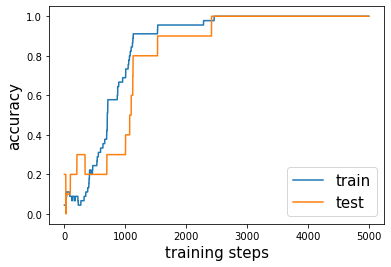

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# dynamics of train/test accuracy
fontsize = 15
plt.plot(np.arange(dic["steps"]), dic["acc_train"])
plt.plot(np.arange(dic["steps"]), dic["acc_test"])
plt.xlabel("training steps", fontsize=fontsize)
plt.ylabel("accuracy", fontsize=fontsize)
plt.legend(["train", "test"], fontsize=fontsize)

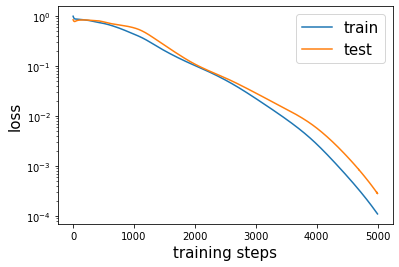

In [6]:
# dynamics of train/test loss
fontsize = 15
plt.plot(np.arange(dic["steps"]), dic["loss_train"])
plt.plot(np.arange(dic["steps"]), dic["loss_test"])
plt.xlabel("training steps", fontsize=fontsize)
plt.ylabel("loss", fontsize=fontsize)
plt.legend(["train", "test"], fontsize=fontsize)
plt.yscale('log')

Text(0, 0.5, 'RQI')

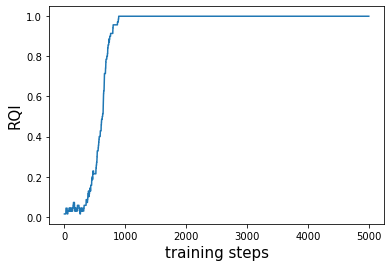

In [7]:
# dynamics of RQI
fontsize = 15
plt.plot(np.arange(dic["steps"]), dic["rqi"])
plt.xlabel("training steps", fontsize=fontsize)
plt.ylabel("RQI", fontsize=fontsize)

Text(0, 0.5, 'Representation')

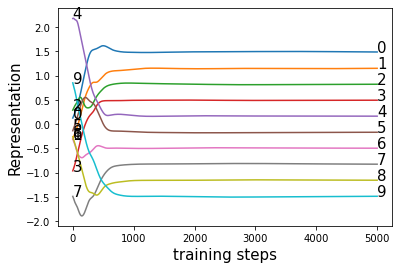

In [8]:
# dynamics of (normalized) representations
# This is Figure 4(d) in paper
fontsize = 15

reprs = dic["repr_normalized_nn"]
p = dic["p"]
steps = dic["steps"]

for i in range(p):
    plt.plot(np.arange(steps), reprs[:,i])
    plt.text(0, reprs[0,i], i, fontsize=fontsize)
    plt.text(steps, reprs[-1,i], i, fontsize=fontsize)
plt.xlabel("training steps", fontsize=fontsize)
plt.ylabel("Representation", fontsize=fontsize)

We can get some statistics of interest:

In [9]:
print("The final training acc is %.2f. The steps to reach training acc=%.2f is %d."%(dic["acc_train"][-1],dic["threshold_train_acc"], dic["iter_train"]))
print("The final test acc is %.2f. The steps to reach test acc=%.2f is %d."%(dic["acc_test"][-1], dic["threshold_test_acc"], dic["iter_test"]))
print("The final RQI is %.2f. The steps to reach RQI=%.2f is %d."%(dic["rqi"][-1], dic["threshold_rqi"], dic["iter_rqi"]))

The final training acc is 1.00. The steps to reach training acc=0.90 is 1130.
The final test acc is 1.00. The steps to reach test acc=0.90 is 1530.
The final RQI is 1.00. The steps to reach RQI=0.95 is 800.


In [10]:
print("A: Ideally, %d out of %d test samples can be predicted correctly."%(dic["ideal_test_acc"]*dic["test_num"], dic["test_num"]))
print("B: Based on the actual representation, %d out of %d test samples can be predicted correctly."%(dic["pred_test_acc"]*dic["test_num"], dic["test_num"]))
print("C: In practice, %d out of %d test samples can be predicted correctly."%(dic["acc_test"][-1]*dic["test_num"], dic["test_num"]))
print("Our theory predicts that A>=B=C (except for luck). This is related to Figure 8(d)(e)(f)")

A: Ideally, 10 out of 10 test samples can be predicted correctly.
B: Based on the actual representation, 10 out of 10 test samples can be predicted correctly.
C: In practice, 10 out of 10 test samples can be predicted correctly.
Our theory predicts that A>=B=C (except for luck). This is related to Figure 8(d)(e)(f)


Task 3: training on the effective loss

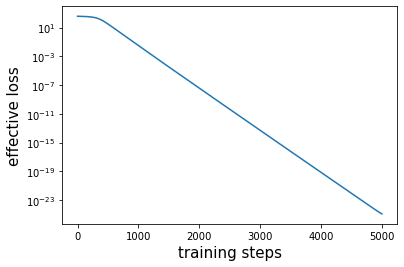

In [11]:
# dynamics of effective loss
plt.plot(np.arange(dic["steps"]), dic["loss_eff"])
plt.yscale('log')
plt.xlabel("training steps", fontsize=fontsize)
plt.ylabel("effective loss", fontsize=fontsize)
plt.yscale('log')

Text(0, 0.5, 'Representation')

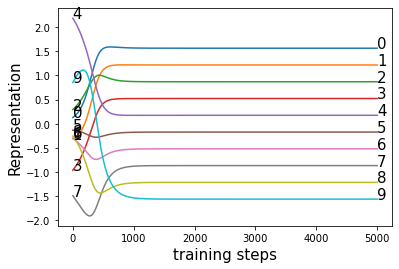

In [12]:
# dynamics of representations under effective loss
# This is Figure 4(c) in paper

fontsize = 15

reprs = dic["repr_eff"]
p = dic["p"]
steps = dic["steps"]

for i in range(p):
    plt.plot(np.arange(steps), reprs[:,i])
    plt.text(0, reprs[0,i], i, fontsize=fontsize)
    plt.text(steps, reprs[-1,i], i, fontsize=fontsize)
plt.xlabel("training steps", fontsize=fontsize)
plt.ylabel("Representation", fontsize=fontsize)

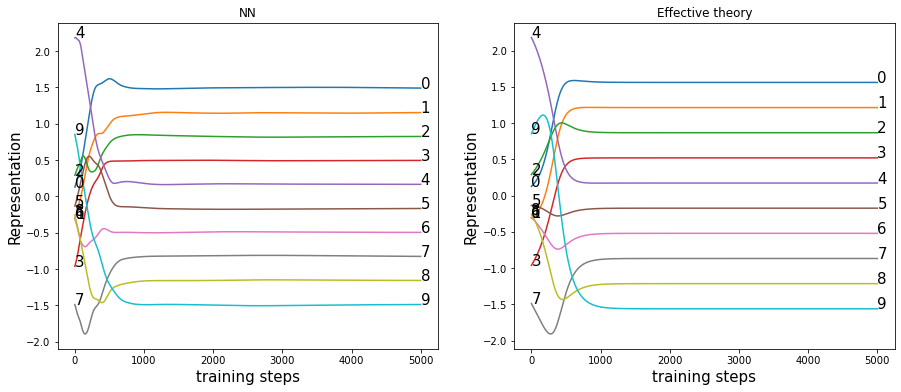

In [13]:
# Compare the dynamics of representations on real gradient descent vs effective loss.
# They basically agree, showing the effectiveness of the effective theory.

plt.figure(figsize=(15,6))

for i in [1,2]:
    plt.subplot(1,2,i)
    fontsize = 15
    if i == 1:
        reprs = dic["repr_normalized_nn"]
        plt.title("NN")
    else:
        reprs = dic["repr_eff"]
        plt.title("Effective theory")
    p = dic["p"]
    steps = dic["steps"]
    for i in range(p):
        plt.plot(np.arange(steps), reprs[:,i])
        plt.text(0, reprs[0,i], i, fontsize=fontsize)
        plt.text(steps, reprs[-1,i], i, fontsize=fontsize)
    plt.xlabel("training steps", fontsize=fontsize)
    plt.ylabel("Representation", fontsize=fontsize)

Finally, we show an example where the representation is 2D.

In [14]:
dic_2d = train_add(reprs_dim=2, steps=5000, loss_type="MSE", train_num=45)

Using device: cpu
----------------------------------------
Task 1: Analyzing the dataset before training...
acc_ideal_test = 10/10=1.0
the degree of freedom (except translation/scaling) for the reprsentation is 0
dof=0 means the linear repr is the unique repr, while dof>0 means existence of other reprs
----------------------------------------
Task 2: Training with neural network...
step: 0  | loss: 0.96222609 
step: 1000  | loss: 0.19234806 
step: 2000  | loss: 0.00194763 
step: 3000  | loss: 0.00004081 
step: 4000  | loss: 0.00000693 
final train acc=1.0000, test acc=0.5000, RQI=0.4000
Steps to reach thresholds: train acc=849, test acc=4999, RQI=4999
----------------------------------------
Task 3: Training with effective loss...
step: 0  | loss: 346.59141138 
step: 1000  | loss: 0.00377247 
step: 2000  | loss: 0.00000000 
step: 3000  | loss: 0.00000000 
step: 4000  | loss: 0.00000000 
saving trajectories...


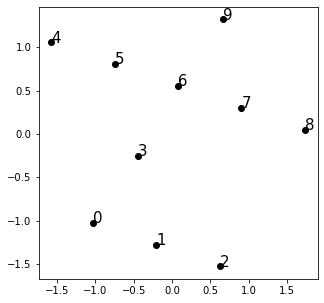

In [15]:
plt.figure(figsize=(5,5))
fontsize = 15
reprs = dic_2d["repr_normalized_nn"][-1]
for i in range(dic_2d["p"]):
    plt.scatter(reprs[i,0], reprs[i,1],color="black")
    plt.text(reprs[i,0], reprs[i,1],i,color="black", fontsize=fontsize)